In [130]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch.nn as nn

In [59]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [60]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [63]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [64]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

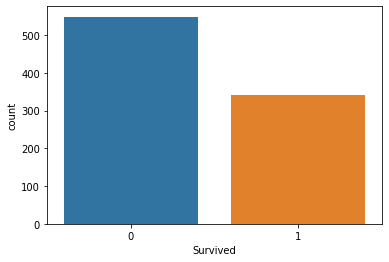

In [65]:
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

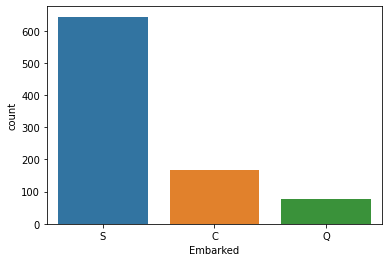

In [66]:
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

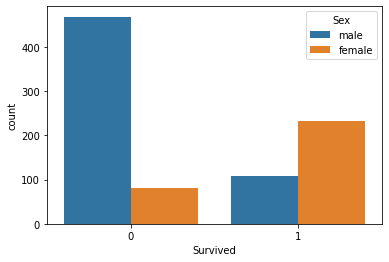

In [67]:
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

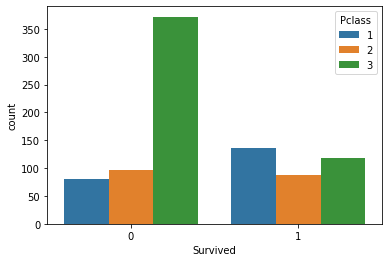

In [68]:
sns.countplot(x='Survived', hue='Pclass', data=df)

<AxesSubplot:ylabel='Frequency'>

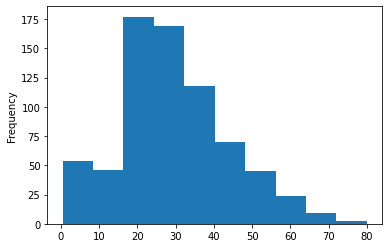

In [69]:
df['Age'].plot.hist()

In [70]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [73]:
df['Age'].fillna(30, inplace=True)

In [77]:
df['Embarked'].fillna('S', inplace=True)

In [78]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [79]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [81]:
e_map = {'S': 1, 'C': 2, 'Q': 3}
df['Embarked'] =  df['Embarked'].map(e_map)

In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [84]:
X =df.drop('Survived', axis=1)

In [103]:
y = df['Survived'].values.reshape(-1,1)

In [93]:
X = X.to_numpy(dtype=np.float32)

In [106]:
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [110]:
y = y.astype(dtype = np.float32)

In [111]:
y.dtype

dtype('float32')

In [116]:
n_samples, n_features = X.shape

In [117]:
print(f"#features: {n_features}, #samples: {n_samples}")

#features: 7, #samples: 891


In [121]:
# 0) Prepare 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

In [122]:
sc = StandardScaler()

In [123]:
X_train = sc.fit_transform(X_train)

In [126]:
X_test = sc.transform(X_test)

In [128]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [135]:
# 1) Model
class Model(nn.Module):
    def __init__(self, n_input_feature):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_feature, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [137]:
model = Model(n_features)

In [138]:
# 2) loss and optimization
lr = .01

criterion = nn.BCELoss()
optimize = torch.optim.SGD(model.parameters(), lr)

In [140]:
# 3) training 
n_epoch = 1000

for epoch in range(n_epoch):
    # 1. forward prop/ calculate y_pred
    y_pred = model(X_train)
    # 2. Calculate Loss
    loss = criterion(y_pred, y_train)
    # 3. backward prop/ Calculate gradient 
    loss.backward()
    # 4. Optimization/ Update weight
    optimize.step()
    # 5. Empty gradient
    optimize.zero_grad()
    
    if (epoch+1)%100 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 100, loss = 0.5785
epoch: 200, loss = 0.5360
epoch: 300, loss = 0.5105
epoch: 400, loss = 0.4942
epoch: 500, loss = 0.4834
epoch: 600, loss = 0.4758
epoch: 700, loss = 0.4703
epoch: 800, loss = 0.4662
epoch: 900, loss = 0.4632
epoch: 1000, loss = 0.4608


In [141]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / y_test.shape[0]
    print(f'accuracy = {acc.item():.4f}')

accuracy = 0.8436
